# Pymaceuticals Inc.
---

### Analysis

- Among the four-drug regimens, Capomulin and Ramicane appear to be more effective in reducing tumor volume compared to Infubinol and Ceftamin since there is a lower median tumor volume for Capomulin and Ramicane.
- There is a positive correlation between mouse weight and the average tumor volume. This indicates that as mouse weight increases, the average tumor volume tends to increase as well. This correlation may suggest that heavier mice tend to develop larger tumors.
- Ceftamin, Capomulin, and Ramicane do not have any outliers, indicating that the data points for these drug regimens are consistent and do not deviate significantly.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='inner')

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice
num_mice = combined_data["Mouse ID"].nunique()
num_mice

249

In [3]:
# Find duplicate mice by Mouse ID and Timepoint
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"])]

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
unique_duplicate_mouse_id = duplicate_mice["Mouse ID"].unique()

for mouse_id in unique_duplicate_mouse_id:
    print(mouse_id)

g989


In [4]:
# Get all data for the duplicate mouse ID
duplicate_mouse_id = "g989"
duplicate_mouse_data = combined_data[combined_data["Mouse ID"] == duplicate_mouse_id]

# Display all data for the duplicate mouse ID
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping duplicate mice by their ID
cleaned_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
cleaned_data = cleaned_data[cleaned_data["Mouse ID"]!="g989"]

# Display the clean DataFrame
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame
num_mice_cleaned = cleaned_data["Mouse ID"].nunique()
num_mice_cleaned

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)']

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor_volume = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_tumor_volume = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_deviation_tumor_volume = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_tumor_volume = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Create a summary statistics DataFrame
summary_stats = pd.DataFrame({
    'Mean': mean_tumor_volume,
    'Median': median_tumor_volume,
    'Variance': variance_tumor_volume,
    'Std Deviation': std_deviation_tumor_volume,
    'SEM': sem_tumor_volume
})

# Display the summary statistics DataFrame
summary_stats

,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

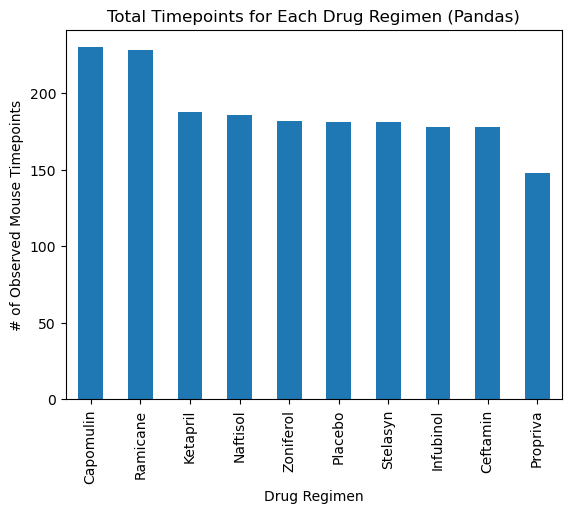

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts_pandas = cleaned_data['Drug Regimen'].value_counts()
drug_counts_pandas.plot(kind='bar', title='Total Timepoints for Each Drug Regimen (Pandas)')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

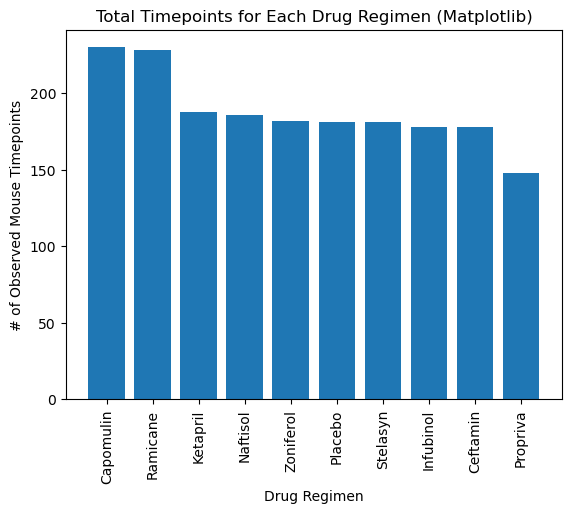

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts_matplotlib = cleaned_data['Drug Regimen'].value_counts()
plt.bar(drug_counts_matplotlib.index, drug_counts_matplotlib.values)
plt.title('Total Timepoints for Each Drug Regimen (Matplotlib)')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

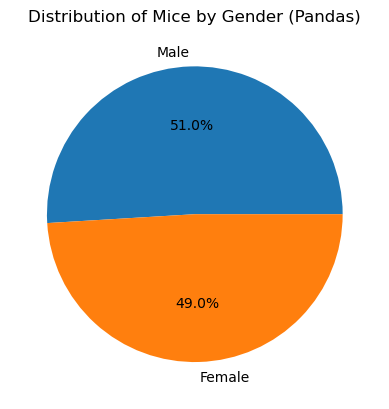

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts_pandas = cleaned_data['Sex'].value_counts()
gender_counts_pandas.plot(kind='pie', autopct='%1.1f%%', title='Distribution of Mice by Gender (Pandas)')
plt.ylabel('')
plt.show()

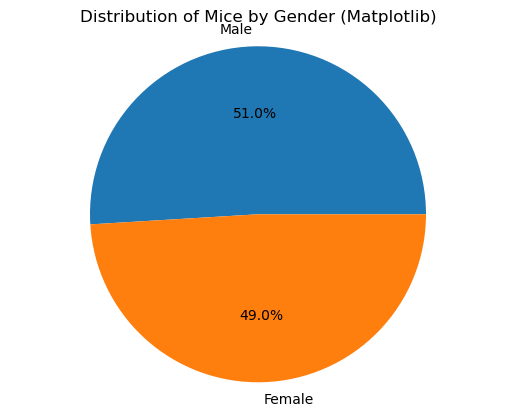

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts_matplotlib = cleaned_data['Sex'].value_counts()
plt.pie(gender_counts_matplotlib, labels=gender_counts_matplotlib.index, autopct='%1.1f%%')
plt.title('Distribution of Mice by Gender (Matplotlib)')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_data = pd.merge(last_timepoint, cleaned_data, on=['Mouse ID', 'Timepoint'], how='inner')

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
regimens_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Loop through each drug regimen to collect tumor volume data
for regimen in regimens_list:
    # Locate the rows which contain mice on each drug
    regimen_data = final_tumor_data[final_tumor_data['Drug Regimen'] == regimen]
    
    # Get the tumor volumes from the subset
    tumor_volumes = regimen_data['Tumor Volume (mm3)']
    tumor_volume_data.append(tumor_volumes)

    # Calculate quartiles and IQR for each regimen
    quartiles = tumor_volumes.quantile([0.25, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Calculate potential outliers using upper and lower bounds
    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr

    # Identify potential outliers in the subset
    outliers = regimen_data[(regimen_data['Tumor Volume (mm3)'] < lower_bound) | (regimen_data['Tumor Volume (mm3)'] > upper_bound)]

    # Print results for each regimen
    print(f"{regimen}:")
    print(f" Lower Quartile: {lowerq}")
    print(f" Upper Quartile: {upperq}")
    print(f" IQR: {iqr}")
    if outliers.empty:
        print(" No Outliers")
    else:
        potential_outliers = outliers[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]
        print(f" Potential Outliers:\n {potential_outliers.to_string(index=False)}")

Capomulin:
 Lower Quartile: 32.37735684
 Upper Quartile: 40.1592203
 IQR: 7.781863460000004
 No Outliers
Ramicane:
 Lower Quartile: 31.56046955
 Upper Quartile: 40.65900627
 IQR: 9.098536719999998
 No Outliers
Infubinol:
 Lower Quartile: 54.04860769
 Upper Quartile: 65.52574285
 IQR: 11.477135160000003
 Potential Outliers:
 Mouse ID  Timepoint  Tumor Volume (mm3)
    c326          5           36.321346
Ceftamin:
 Lower Quartile: 48.72207785
 Upper Quartile: 64.29983003
 IQR: 15.577752179999997
 No Outliers


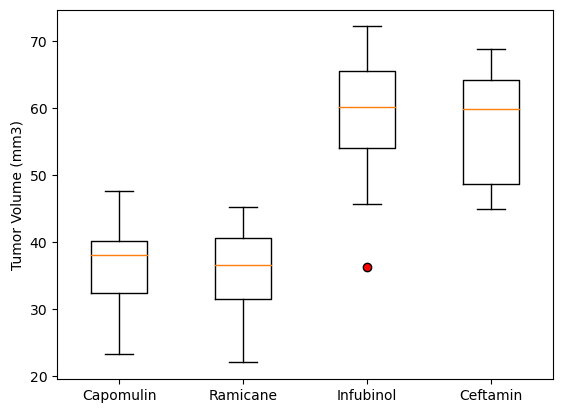

In [15]:
# Create a box plot
plt.boxplot(tumor_volume_data, labels=regimens_list, flierprops={'marker': 'o', 'markerfacecolor': 'red'})
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

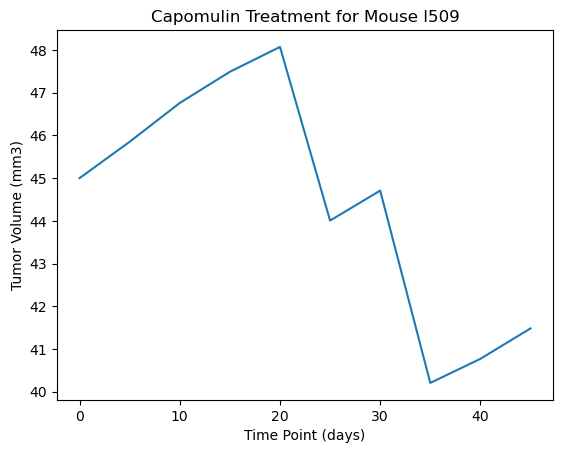

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Select a single mouse treated with Capomulin
capomulin_mouse = cleaned_data[(cleaned_data['Drug Regimen'] == 'Capomulin') & (cleaned_data['Mouse ID'] == 'l509')]

# Line plot for tumor volume vs. time point
plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse['Tumor Volume (mm3)'])
plt.title('Capomulin Treatment for Mouse l509')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

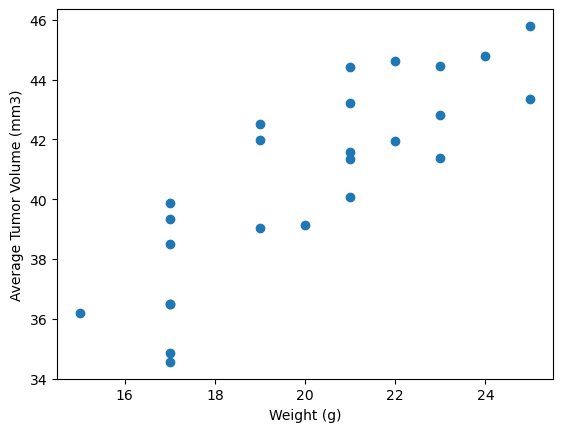

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
plt.scatter(mouse_weight, average_tumor_volume)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


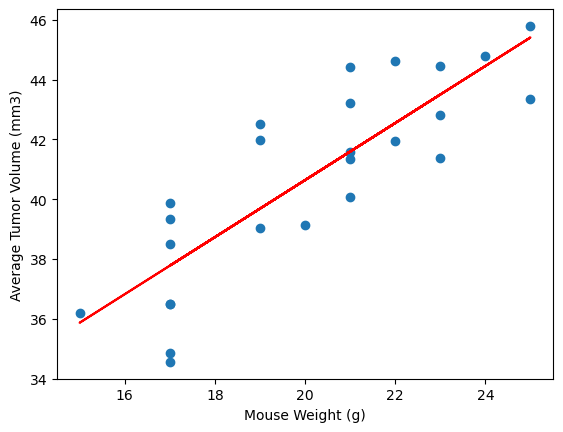

In [36]:
# Calculate the correlation coefficient and a linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Filter data for the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Group data by Mouse ID and calculate average tumor volume and mouse weight
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Calculate the correlation coefficient
correlation_coefficient = round(average_tumor_volume.corr(mouse_weight), 2)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, average_tumor_volume)

# Calculate the predicted tumor volume values using the linear regression model
predicted_tumor_volume = slope * mouse_weight + intercept

# Create a scatter plot
plt.scatter(mouse_weight, average_tumor_volume, marker='o', label='Data Points')
plt.plot(mouse_weight, predicted_tumor_volume, 'r-', label='Linear Regression')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient}")

plt.show()